In [27]:
import pandas as pd
import json

In [91]:
# plotting
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

## Read Data

In [28]:
csv_file = 'data/EXPORT_09042017173622.csv'
json_file = 'data/gestures.json'

In [46]:
# Gesture List with names
with open(json_file) as data_file:    
    gestures = json.load(data_file)
    # j = json.loads(input_file.read().decode("utf-8-sig"))

In [45]:
gestures_df = pd.DataFrame.from_dict(gestures['gestures'])
gestures_df.set_index('id', inplace=True)
gestures_df

,$oid,isGarbage,isNesture,name,slug
id,,,,,
G01,58a23a22d826756404709446,NaN,NaN,Single Rotation klein rechtsrum,rssr
G02,58a23a22d826756404709447,NaN,NaN,Single Rotation klein linksrum,rssl
G03,58a23a22d826756404709448,NaN,NaN,Oszillierende Rotation klein rechtsrum,rosr
G04,58a23a22d826756404709449,NaN,NaN,Oszillierende Rotation klein linksrum,rosl
G05,58a23a22d82675640470944a,NaN,NaN,Single Rotation groß rechtsrum,rsbr
G06,58a23a22d82675640470944b,NaN,NaN,Single Rotation groß linksrum,rsbl
G07,58a23a22d82675640470944c,NaN,NaN,Oszillierende Rotation groß rechtsrum,robr
G08,58a23a22d82675640470944d,NaN,NaN,Oszillierende Rotation groß linksrum,robl
G09,58a23a22d82675640470944e,NaN,NaN,Kontinuierliche Rotation groß rechtsrum,rcbr


In [104]:
def gesture_name(gesture_id):
    return gestures_df.loc[gesture_id,'name']

In [2]:
# Experiment Data
data = pd.read_csv(csv_file)
data.shape

/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py:2871: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [48]:
data.shape

(1435576, 26)

In [47]:
data.columns

Index([u'Trainset-ID', u'Experiment-ID', u'Subject-ID', u'Observer-ID',
       u'collectedByHand', u'Collector-ID', u'TimeStamp', u'RFID-ID',
       u'GRASP-A', u'GRASP-B', u'GRASP-C', u'AX', u'AY', u'AZ', u'EX', u'EY',
       u'EZ', u'USERINPUT', u'HANDINGLOVE', u' Parcours-ID', u'Parcours-Step',
       u'Mutation-ID', u' Mutation/HandIsActive', u'Host-ID', u'Host/Spot-ID',
       u'Gesture-ID'],
      dtype='object')

In [4]:
data.head()

,Trainset-ID,Experiment-ID,Subject-ID,Observer-ID,collectedByHand,Collector-ID,TimeStamp,RFID-ID,GRASP-A,GRASP-B,...,EZ,USERINPUT,HANDINGLOVE,Parcours-ID,Parcours-Step,Mutation-ID,Mutation/HandIsActive,Host-ID,Host/Spot-ID,Gesture-ID
0,_TRAINSET14022017094616,E001,Andreas,Clemens,right,R01,0,000000000000,781,8,...,-81.9375,False,True,P101,1,M151,True,H008,NaN,G15
1,_TRAINSET14022017094616,E001,Andreas,Clemens,left,L01,19896,000000000000,212,213,...,-84.5625,False,False,P101,1,M151,False,NaN,NaN,NaN
2,_TRAINSET14022017094616,E001,Andreas,Clemens,right,R01,29001,000000000000,782,0,...,-81.9375,False,True,P101,1,M151,True,H008,NaN,G15
3,_TRAINSET14022017094616,E001,Andreas,Clemens,left,L01,29823,000000000000,179,185,...,-84.5625,False,False,P101,1,M151,False,NaN,NaN,NaN
4,_TRAINSET14022017094616,E001,Andreas,Clemens,right,R01,46136,000000000000,782,6,...,-81.8750,False,True,P101,1,M151,True,H008,NaN,G15


## Some Data Stats

In [7]:
# how many subjects
data['Subject-ID'].unique().tolist()

['Andreas', 'Alfred', 'Claudia', 'Dominik']

In [8]:
# how many observers
data['Observer-ID'].unique().tolist()

['Clemens']

In [10]:
# how many hands
data['Collector-ID'].unique().tolist()

['R01', 'L01']

In [11]:
# how many RFID ids
data['RFID-ID'].unique().tolist()

['000000000000',
 '09006734114B',
 0,
 '05003DD5CD20',
 '760057911BAB',
 '13005E4BB7B1',
 '1400135B8AD6',
 '14001486BE38',
 '7600577D0D51',
 '140014CD1AD7',
 '280015E55981',
 '05008C2F993F']

In [9]:
# how many experiments
data['Experiment-ID'].unique().tolist()

['E001', 'E002', 'E003', 'E004', 'E005', 'E006', 'E007', 'E008']

In [24]:
# how many training sets
len(data['Trainset-ID'].unique().tolist())

539

In [17]:
# how many parcours
len(data[' Parcours-ID'].unique())

116

In [19]:
# how many parcours steps
data['Parcours-Step'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [20]:
# how many mutations
len(data['Mutation-ID'].unique())

177

In [21]:
# how many gestures
len(data['Gesture-ID'].unique())

19

In [22]:
# how many hosts
len(data['Host-ID'].unique())

10

## Data Preprocessing

In [ ]:
# rename some columns as the - in the column name does not allow for data.query()) to be used
# cut off the "-ID" suffix and replace - by _

for col in data.columns:
    if col.endswith('-ID'):
        data.rename(columns={col: col[:-3]}, inplace=True)
        print "Renamed", col, "->", col[:-3]
    elif '-' in col:
        new_col = col.replace('-','_')
        data.rename(columns={col: new_col}, inplace=True)
        print "Renamed", col, "->", new_col

In [82]:
data.rename(columns={'Experiment-ID': 'Experiment'}, inplace=True)  

In [53]:
# remove rows that are not needed:
# all where Gesture-ID is NaN  (implies 'Mutation/HandIsActive' == False and Host is NaN)

data.dropna(axis=0, subset=['Gesture-ID'], inplace=True)

In [67]:
# remove columns that we don#t need
# to be ignored as communicated by MOM
cols_to_remove = ['Trainset-ID','USERINPUT', 'HANDINGLOVE', 'Observer-ID','Collector-ID','Host/Spot-ID','RFID-ID',
                 ' Mutation/HandIsActive']
#TODO check Host/Spot-ID, Mutation
data.drop(cols_to_remove,inplace=True,axis=1)

In [68]:
data.shape

(780299, 18)

In [58]:
# also in this evaluation, we use only one-hand devices and only people who are right-handers
data['collectedByHand'].unique().tolist()

['right', 'left']

In [64]:
data['HANDINGLOVE'].unique().tolist()

[True, False]

In [60]:
sum(data['collectedByHand']=='right')

711360

In [59]:
# Q: keep left hand data or not?
sum(data['collectedByHand']=='left')
# TODO remove?

68939

In [ ]:
# filter right hand, throw away left hand


In [ ]:
# TODO check Mutation/HandIsActive -> filter out False!

## Look into the Data

In [76]:
data.head()

,Experiment-ID,Subject,collectedByHand,TimeStamp,GRASP-A,GRASP-B,GRASP-C,AX,AY,AZ,EX,EY,EZ,Parcours-ID,Parcours-Step,Mutation-ID,Host-ID,Gesture-ID
0,E001,Andreas,right,0,781,8,797,0.06,-0.02,-0.10,216.8125,9.0625,-81.9375,P101,1,M151,H008,G15
2,E001,Andreas,right,29001,782,0,799,0.09,-0.04,-0.11,217.0625,9.0625,-81.9375,P101,1,M151,H008,G15
4,E001,Andreas,right,46136,782,6,798,0.12,-0.09,0.09,217.4375,9.1250,-81.8750,P101,1,M151,H008,G15
6,E001,Andreas,right,74902,784,7,798,0.08,-0.08,0.03,217.6250,9.1250,-81.8125,P101,1,M151,H008,G15
8,E001,Andreas,right,97663,781,0,798,0.07,-0.09,0.04,217.9375,9.1875,-81.7500,P101,1,M151,H008,G15


In [92]:
exp = 'E001'
subject = 'Andreas'
gesture = 'G15'
mydata = data.query('Experiment==@exp and Subject==@subject and Gesture==@gesture')
mydata.shape

(17493, 18)

In [121]:
mydata

,Experiment,Subject,collectedByHand,TimeStamp,GRASP_A,GRASP_B,GRASP_C,AX,AY,AZ,EX,EY,EZ,Parcours,Parcours_Step,Mutation,Host,Gesture
0,E001,Andreas,right,0,781,8,797,0.06,-0.02,-0.10,216.8125,9.0625,-81.9375,P101,1,M151,H008,G15
2,E001,Andreas,right,29001,782,0,799,0.09,-0.04,-0.11,217.0625,9.0625,-81.9375,P101,1,M151,H008,G15
4,E001,Andreas,right,46136,782,6,798,0.12,-0.09,0.09,217.4375,9.1250,-81.8750,P101,1,M151,H008,G15
6,E001,Andreas,right,74902,784,7,798,0.08,-0.08,0.03,217.6250,9.1250,-81.8125,P101,1,M151,H008,G15
8,E001,Andreas,right,97663,781,0,798,0.07,-0.09,0.04,217.9375,9.1875,-81.7500,P101,1,M151,H008,G15
10,E001,Andreas,right,116448,784,4,800,0.12,-0.06,-0.03,218.3125,9.2500,-81.7500,P101,1,M151,H008,G15
12,E001,Andreas,right,148753,783,0,798,0.21,-0.04,0.03,218.5000,9.3125,-81.7500,P101,1,M151,H008,G15
14,E001,Andreas,right,167422,784,2,798,0.18,-0.10,-0.08,218.6875,9.3750,-81.7500,P101,1,M151,H008,G15
16,E001,Andreas,right,187481,782,4,799,0.15,-0.18,-0.03,219.0000,9.4375,-81.7500,P101,1,M151,H008,G15
18,E001,Andreas,right,213733,784,13,799,0.15,-0.18,-0.17,219.1250,9.4375,-81.7500,P101,1,M151,H008,G15


### Visualize timeline of sensor data

In [118]:
def myplot(var):
    y = mydata[var]
    x = range(len(y))
    #x = mydata['TimeStamp']
    plt.plot(x, y)
    title = "%s %s %s %s %s" % (exp,subject,gesture,gesture_name(gesture),var)
    plt.title(title)
    #plt.show()

In [122]:
mydata[var]

0               0
2           29001
4           46136
6           74902
8           97663
10         116448
12         148753
14         167422
16         187481
18         213733
20         240020
23         271269
24         295283
26         308786
28         333771
30         348736
33         402466
34         405016
36         427680
39         457229
40         472830
42         497481
44         514925
46         538627
48         563972
50         591295
53         625027
54         640288
55         658853
57         682574
           ...   
132057    1462636
132058    1484854
132060    1514754
132063    1538745
132064    1560003
132068    1607333
132069    1608816
132070    1632578
132073    1659831
132075    1676245
132077    1702270
132079    1727366
132081    1747323
132083    1790144
132084    1793705
132087    1827436
132089    1846067
132091    1871199
132093    1897306
132094    1914898
132097    1942413
132098    1960025
132101    1984808
132103    2007634
132104    

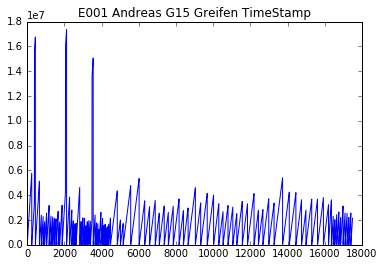

In [123]:
    y = mydata[var]
    x = range(len(y))
    #x = mydata['TimeStamp']
    plt.plot(x, y)
    title = "%s %s %s %s %s" % (exp,subject,gesture,gesture_name(gesture),var)
    plt.title(title)
    #plt.show()

In [ ]:
# TODO filter by Parcours, Parcours_Step, Mutation u/o Host

In [141]:
mydata[' Parcours'].unique().tolist()

['P101',
 'P102',
 'P103',
 'P104',
 'P105',
 'P106',
 'P107',
 'P108',
 'P109',
 'P110',
 'P111',
 'P112',
 'P113',
 'P114',
 'P115',
 'P116',
 'P117',
 'P118',
 'P401',
 'P402',
 'P403',
 'P201',
 'P202',
 'P203',
 'P204',
 'P205',
 'P206',
 'P207',
 'P208',
 'P211',
 'P212',
 'P213',
 'P216',
 'P217',
 'P218',
 'P221',
 'P222',
 'P223',
 'P226',
 'P227',
 'P228',
 'P701',
 'P702',
 'P705',
 'P706',
 'P709',
 'P710',
 'P713',
 'P714',
 'P801',
 'P802',
 'P601',
 'P602',
 'P603',
 'P606',
 'P607',
 'P608']

In [139]:
mydata['Parcours_Step'].unique().tolist()

[1, 9]

In [138]:
mydata['Mutation'].unique().tolist()

['M151', 'M452', 'M251', 'M257', 'M751', 'M752', 'M851', 'M651']

In [140]:
mydata['Host'].unique().tolist()

['H008', 'H036', 'H122', 'H011', 'H038', 'H070']

In [134]:
mydata[0:400]

,Experiment,Subject,collectedByHand,TimeStamp,GRASP_A,GRASP_B,GRASP_C,AX,AY,AZ,EX,EY,EZ,Parcours,Parcours_Step,Mutation,Host,Gesture
0,E001,Andreas,right,0,781,8,797,0.06,-0.02,-0.10,216.8125,9.0625,-81.9375,P101,1,M151,H008,G15
2,E001,Andreas,right,29001,782,0,799,0.09,-0.04,-0.11,217.0625,9.0625,-81.9375,P101,1,M151,H008,G15
4,E001,Andreas,right,46136,782,6,798,0.12,-0.09,0.09,217.4375,9.1250,-81.8750,P101,1,M151,H008,G15
6,E001,Andreas,right,74902,784,7,798,0.08,-0.08,0.03,217.6250,9.1250,-81.8125,P101,1,M151,H008,G15
8,E001,Andreas,right,97663,781,0,798,0.07,-0.09,0.04,217.9375,9.1875,-81.7500,P101,1,M151,H008,G15
10,E001,Andreas,right,116448,784,4,800,0.12,-0.06,-0.03,218.3125,9.2500,-81.7500,P101,1,M151,H008,G15
12,E001,Andreas,right,148753,783,0,798,0.21,-0.04,0.03,218.5000,9.3125,-81.7500,P101,1,M151,H008,G15
14,E001,Andreas,right,167422,784,2,798,0.18,-0.10,-0.08,218.6875,9.3750,-81.7500,P101,1,M151,H008,G15
16,E001,Andreas,right,187481,782,4,799,0.15,-0.18,-0.03,219.0000,9.4375,-81.7500,P101,1,M151,H008,G15
18,E001,Andreas,right,213733,784,13,799,0.15,-0.18,-0.17,219.1250,9.4375,-81.7500,P101,1,M151,H008,G15


In [131]:
mydata['TimeStamp'].diff().describe()

count    1.749200e+04
mean     1.229068e+02
std      3.433498e+05
min     -1.737053e+07
25%      7.352500e+03
50%      1.491600e+04
75%      2.271950e+04
max      1.218731e+07
Name: TimeStamp, dtype: float64

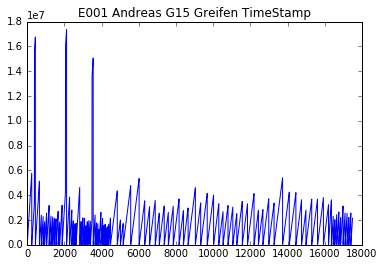

In [120]:
var = 'TimeStamp'
myplot(var)

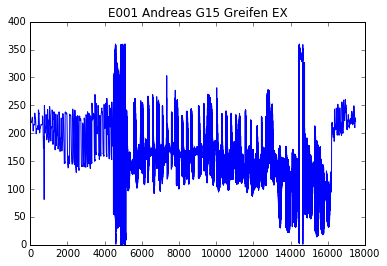

In [119]:
var = 'EX'
myplot(var)

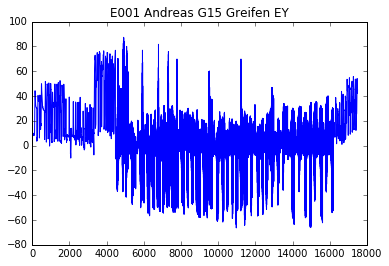

In [109]:
var = 'EY'
myplot(var)

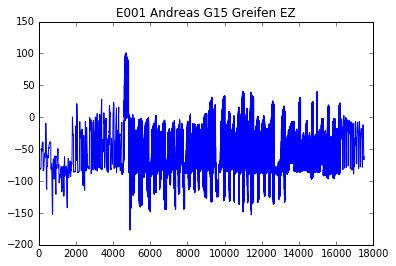

In [110]:
var = 'EZ'
myplot(var)

In [ ]:
mydata

In [ ]:
# Standardize

In [ ]:
# Make groupings by Subject, Experiment, 

In [ ]:
# Calc derivatives

In [ ]:
# Time Normalize?

## Tasks

### 1) Recognize Host + Gesture

(maybe also Subject)

### 2) Recognize Gesture independent of host